RuntimeError: Requested MovieWriter (ffmpeg) not available

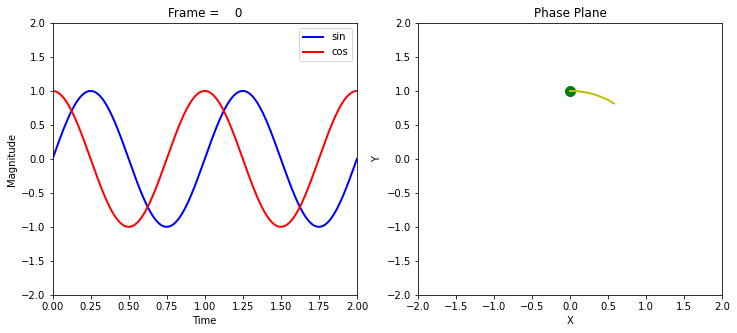

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos']);

# animation function. This is called sequentially
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1[0:50],y2[0:50])
    pt1.set_data(y1[0],y2[0])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)

from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)

#from IPython.display import HTML
#HTML(anim.to_html5_video())

from matplotlib import rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

anim


In [4]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import mpl_toolkits.axes_grid1
import matplotlib.widgets

class Player(FuncAnimation):
    def __init__(self, fig, func, frames=None, init_func=None, fargs=None,
                 save_count=None, mini=0, maxi=100, pos=(0.125, 0.92), **kwargs):
        self.i = 0
        self.min=mini
        self.max=maxi
        self.runs = False
        self.forwards = True
        self.fig = fig
        self.func = func
        self.setup(pos)
        FuncAnimation.__init__(self,self.fig, self.update, frames=self.play(), 
                                           init_func=init_func, fargs=fargs,
                                           save_count=save_count, **kwargs )    

    def play(self):
        while self.runs:
            self.i = self.i+self.forwards-(not self.forwards)
            if self.i > self.min and self.i < self.max:
                yield self.i
            else:
                self.stop()
                yield self.i

    def start(self):
        self.runs=True
        self.event_source.start()

    def stop(self, event=None):
        self.runs = False
        self.event_source.stop()

    def forward(self, event=None):
        self.forwards = True
        self.start()
    def backward(self, event=None):
        self.forwards = False
        self.start()
    def oneforward(self, event=None):
        self.forwards = True
        self.onestep()
    def onebackward(self, event=None):
        self.forwards = False
        self.onestep()

    def onestep(self):
        if self.i > self.min and self.i < self.max:
            self.i = self.i+self.forwards-(not self.forwards)
        elif self.i == self.min and self.forwards:
            self.i+=1
        elif self.i == self.max and not self.forwards:
            self.i-=1
        self.func(self.i)
        self.slider.set_val(self.i)
        self.fig.canvas.draw_idle()

    def setup(self, pos):
        playerax = self.fig.add_axes([pos[0],pos[1], 0.64, 0.04])
        divider = mpl_toolkits.axes_grid1.make_axes_locatable(playerax)
        bax = divider.append_axes("right", size="80%", pad=0.05)
        sax = divider.append_axes("right", size="80%", pad=0.05)
        fax = divider.append_axes("right", size="80%", pad=0.05)
        ofax = divider.append_axes("right", size="100%", pad=0.05)
        sliderax = divider.append_axes("right", size="500%", pad=0.07)
        self.button_oneback = matplotlib.widgets.Button(playerax, label='$\u29CF$')
        self.button_back = matplotlib.widgets.Button(bax, label='$\u25C0$')
        self.button_stop = matplotlib.widgets.Button(sax, label='$\u25A0$')
        self.button_forward = matplotlib.widgets.Button(fax, label='$\u25B6$')
        self.button_oneforward = matplotlib.widgets.Button(ofax, label='$\u29D0$')
        self.button_oneback.on_clicked(self.onebackward)
        self.button_back.on_clicked(self.backward)
        self.button_stop.on_clicked(self.stop)
        self.button_forward.on_clicked(self.forward)
        self.button_oneforward.on_clicked(self.oneforward)
        self.slider = matplotlib.widgets.Slider(sliderax, '', 
                                                self.min, self.max, valinit=self.i)
        self.slider.on_changed(self.set_pos)

    def set_pos(self,i):
        self.i = int(self.slider.val)
        self.func(self.i)

    def update(self,i):
        self.slider.set_val(i)


### using this class is as easy as using FuncAnimation:            

fig, ax = plt.subplots()
x = np.linspace(0,6*np.pi, num=100)
y = np.sin(x)

ax.plot(x,y)
point, = ax.plot([],[], marker="o", color="crimson", ms=15)

def update(i):
    point.set_data(x[i],y[i])

ani = Player(fig, update, maxi=len(y)-1)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=1, description='w', max=10), FloatSlider(value=1.0, description='amp', m…

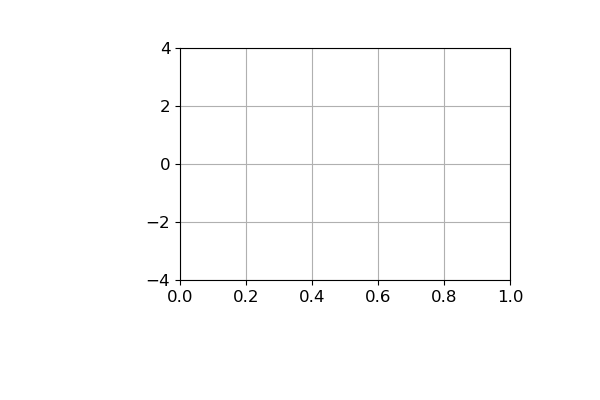

In [33]:
%matplotlib widget

from ipywidgets import *
import numpy as np
from matplotlib import pyplot as plt

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([-4, 4])
ax.grid(True)
 
# generate x values
x = np.linspace(0, 2 * np.pi, 100)
 
def my_sine(x, w, amp, phi):
    """
    Return a sine for x with angular frequeny w and amplitude amp.
    """
    return amp*np.sin(w * (x-phi))
    
@widgets.interact_manual(w=(0, 10, 1), amp=(0, 4, .1), phi=(0, 2*np.pi+0.01, 0.01))

def update(w = 1.0, amp=1, phi=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, my_sine(x, w, amp, phi), color='C0')

In [2]:

import numpy as np

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, output_notebook, output_file, show

x = np.linspace(0, 10, 500)
y = np.sin(x)
dimension1 = 400
source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), plot_width=dimension1, plot_height=dimension1, toolbar_location="left")

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)


amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, amp=amp_slider, freq=freq_slider, phase=phase_slider, offset=offset_slider),
                    code="""
    const data = source.data;
    const A = amp.value;
    const k = freq.value;
    const phi = phase.value;
    const B = offset.value;
    const x = data['x']
    const y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

amp_slider.js_on_change('value', callback)
freq_slider.js_on_change('value', callback)
phase_slider.js_on_change('value', callback)
offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)
plot.yaxis.axis_label = r"\[\sin(x)\]"
plot.xaxis.axis_label = r"\[x\cdot\pi\]"
output_notebook()

show(layout)

Loading BokehJS ...

In [1]:
import bokeh.plotting as bplt
from jupyter_bokeh.widgets import BokehModel
import bokeh.io
import numpy as np
import pandas as pd
import requests
import random
from ipywidgets import widgets, Layout
from IPython.display import display

# for the ipython notebook
bplt.output_notebook()

CSSNAMESLINK="https://gist.githubusercontent.com/ek/913fe6905da054977ab9ebc00fc43470/raw/4294f90b9dee884a1146e40e7fc57ada62eb82a0/html-color-names-keywords-list.txt"
css_response = requests.get(CSSNAMESLINK)
cssnames = css_response.text.split()

# generate simulated data
numvals = 1000 # 10000
#numvals = 10
xcol = np.arange(0, numvals, 1)
df = pd.DataFrame(dtype=np.int64)
for iser in range(0, 3):
    for ix in xcol:
        irow = iser*len(xcol)+ix
        df.at[irow, 0] = int(iser)
        df.at[irow, 1] = int(ix)
        df.at[irow, 2] = int( ix*(iser+2)*0.3 )
df = df.rename(columns={0: "ser", 1: "xcol", 2: "ycol"})
df = df.astype(np.int64) # without this, getting floats

# prepare plot
datachans = df["ser"].unique()
mycolors = random.sample(cssnames, len(datachans))
print(mycolors)

myfig = bplt.figure(plot_height=300, tools="pan,wheel_zoom,box_zoom,hover,reset", sizing_mode="stretch_width")
traces_l = []
for ichan in datachans:
    # use .circle here instead of .line, as it meeds more drawing/is more sluggish
    line = myfig.circle([0,0], [0,0], line_width=2, line_color=mycolors[ichan])
    traces_l.append(line)
myfig.x_range.start = 0 ; myfig.x_range.end = numvals
myfig.y_range.start = 0 ; myfig.y_range.end = numvals

the_slider = widgets.IntSlider(min=0, max=len(datachans), description='Test:')

myfig_model = BokehModel(myfig)
#handle_myfig = bokeh.io.show(myfig, notebook_handle=True) # direct in VBox: TraitError: The 'children' trait of a VBox instance contains an Instance of a TypedTuple which expected a Widget, not the CommsHandle 
#myfig_model = BokehModel(handle_myfig) # AssertionError: isinstance(model, LayoutDOM) 

the_ui = widgets.VBox([the_slider, myfig_model])
#the_ui = widgets.VBox([the_slider, handle_myfig])

def update_plot(newval):
    for ichan in datachans:
        this_ch_data = df[df["ser"]==ichan]
        traces_l[ichan].data_source.data={ 'x': this_ch_data["xcol"].values, 'y': this_ch_data["ycol"].values+newval }

def on_slider_change(change):
    if change['type'] == 'change' and change['name'] == 'value': # prevent multiple hits upon single value change
        update_plot(change['new']*0.1*numvals)
        # "Next tick callbacks only work within the context of a Bokeh server session. This function will no effect when Bokeh outputs to standalone HTML or Jupyter notebook cells."
        #bplt.curdoc().add_next_tick_callback(update_plot)
the_slider.observe(on_slider_change)


display(the_ui)
on_slider_change({'type': 'change', 'name': 'value', 'new': 0 }) # initial call

Loading BokehJS ...

['SlateGrey', 'AntiqueWhite', 'DarkRed']


In [ ]:
import yaml

from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Slider
from bokeh.plotting import figure
from bokeh.themes import Theme
from bokeh.io import show, output_notebook

from bokeh.sampledata.sea_surface_temperature import sea_surface_temperature

output_notebook()

def bkapp(doc):
    df = sea_surface_temperature.copy()
    source = ColumnDataSource(data=df)

    plot = figure(x_axis_type='datetime', y_range=(0, 25),
                  y_axis_label='Temperature (Celsius)',
                  title="Sea Surface Temperature at 43.18, -70.43")
    plot.line('time', 'temperature', source=source)

    def callback(attr, old, new):
        if new == 0:
            data = df
        else:
            data = df.rolling('{0}D'.format(new)).mean()
        source.data = ColumnDataSource.from_df(data)

    slider = Slider(start=0, end=30, value=0, step=1, title="Smoothing by N Days")
    slider.on_change('value', callback)

    doc.add_root(column(slider, plot))

    doc.theme = Theme(json=yaml.load("""
        attrs:
            Figure:
                background_fill_color: "#DDDDDD"
                outline_line_color: white
                toolbar_location: above
                height: 500
                width: 800
            Grid:
                grid_line_dash: [6, 4]
                grid_line_color: white
    """, Loader=yaml.FullLoader))


show(bkapp) # notebook_url="http://localhost:8888" 


In [3]:

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import integrate

plt.close('all')

def solve_lorenz(sigma=10.0, beta=8./3, rho=28.0):
    """Plot a solution to the Lorenz differential equations."""

    max_time = 4.0
    N = 30

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)
    angle = 104
    ax.view_init(30, angle)
    plt.show()

    return t, x_t

%matplotlib inline
from ipywidgets import interactive, fixed

w=interactive(solve_lorenz,sigma=(0.0,50.0),rho=(0.0,50.0))
w

interactive(children=(FloatSlider(value=10.0, description='sigma', max=50.0), FloatSlider(value=2.666666666666…

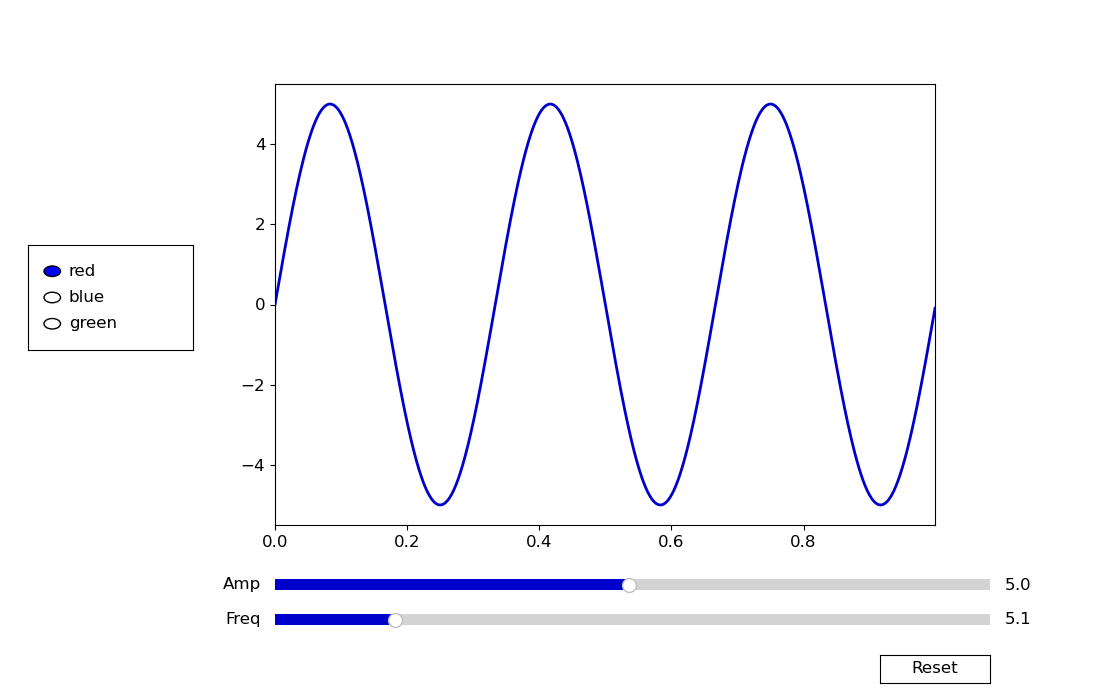

In [9]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons, RangeSlider

plt.close('all')

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
ax.margins(x=0)

axcolor = 'white'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

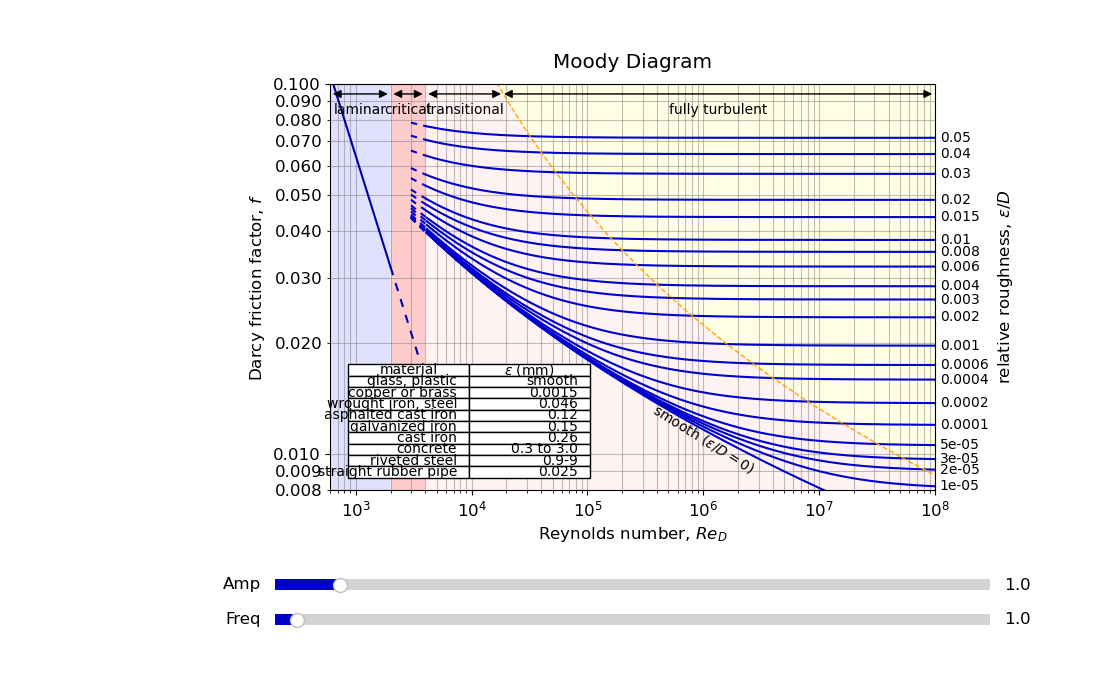

In [1]:
%matplotlib widget
try:
    import numpy
    import scipy.optimize
except ImportError:
    print("This example must have both numpy and scipy installed.")

import functools
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons, RangeSlider

matplotlib.rcParams['figure.figsize'] = (11.0,7.0)
matplotlib.rcParams['font.size'] = 12.0
matplotlib.rcParams['figure.subplot.left'] = 0.3
matplotlib.rcParams['figure.subplot.right'] = 0.85
matplotlib.rcParams['figure.subplot.bottom'] = 0.3
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['lines.linewidth'] = 1

matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=['#0000CC'])
#matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=['#0000AA','#AA0000','#00AA00'])
#matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=['blue','magenta','green','cyan'])
ccycle = matplotlib.rcParams['axes.prop_cycle']

def colebrook(f,ks_D,Re):
    # meant to be used as part of a Newton iteration, so the equation has been rearranged such that
    # it is equal to zero.
    sf = numpy.sqrt(f)
    return -2*numpy.log10(ks_D/3.7 + 2.51/Re/sf) - 1/sf
    
def draw_range_arrow(x1,x2,y,label,fudge=0.005):
    # hmm, this doesn't work.  Have to transform things manually.
    #plt.arrow(6e2,0.02,2e3-6e2,0.0,transform=plt.gca().transData,length_includes_head=True,shape='full')
    # it appears that using arrow directly does not allow one to put arrow heads on both ends, nor does
    # it obey the log transformation correctly.
    xy1 = (x1,y)
    xy2 = (x2,y)
    plt.text(10**(0.5*(numpy.log10(xy1[0])+numpy.log10(xy2[0]))),xy1[1]-fudge,label,ha='center',va='top',size=10,zorder=500)
    plt.annotate('',xy1,xy2,arrowprops=dict(arrowstyle='<|-|>',fc='black'))#,xycoords='axes fraction',zorder=500)


# list of relative roughnesses to compute a curve for.
rrlist = [0.0,0.00001,0.00002,0.00003,0.00005,0.0001,0.0002,0.0004,0.0006,0.001,0.002,0.003,0.004,0.006,0.008,0.01,0.015,0.02,0.03,0.04,0.05]

# range of Reynolds numbers to use for computing the turbulent friction factors.  Will be equally 
# spaced logarithmically over the range.
Remin_t = 3e3
Remax_t = 100e6

# set the limits of the chart
Remin = 6e2
Remax = Remax_t
fmin  = 0.008
fmax = 0.1

Rerange = numpy.linspace(numpy.log10(Remin_t),numpy.log10(Remax_t),200)
Rerange = 10**Rerange

# do the computation first.
f0 = 0.03
curve = {}
for ks_D in rrlist:
    ff = numpy.zeros(Rerange.shape)
    for idx,Re in enumerate(Rerange):
        func = functools.partial(colebrook,ks_D=ks_D,Re=Re)
        f = scipy.optimize.newton(func,f0)
        ff[idx] = f
        f0 = f # use the initial guess from previous solution
    curve[ks_D] = ff

# generate the data for the curve that shows the demarcation between transitional flow
# and fully rough flow.    
ReT = []
fT = []
f0 = curve[rrlist[1]][-1]
for ks_D in rrlist[1:] + [0.06,0.07,0.08,0.09,0.1]:
    ReT.append(1600.0/ks_D)
    func = functools.partial(colebrook,ks_D=ks_D,Re=ReT[-1])
    fT.append(scipy.optimize.newton(func,f0))
    f0 = fT[-1]
        
# also compute the laminar friction factor
Rerange_l1 = numpy.linspace(numpy.log10(1e2),numpy.log10(2e3),5)
Rerange_l1 = 10**Rerange_l1
Rerange_l2 = numpy.linspace(numpy.log10(2e3),numpy.log10(3.5e3),5)
Rerange_l2 = 10**Rerange_l2
flaminar1 = 64/Rerange_l1
flaminar2 = 64/Rerange_l2

# now, do some plotting.

# plot the laminar curve   
plt.loglog(Rerange_l1,flaminar1,color='#0000AA',lw=1.5) 
plt.loglog(Rerange_l2,flaminar2,color='#0000AA',linestyle='dashed',dashes=[4,4],lw=1.5)

# plot the curves in the transitional/turbulent zone for each roughness
for i,ks_D in enumerate(rrlist):
    cutoff = 7
    plt.loglog( Rerange[cutoff-1:],curve[ks_D][cutoff-1:],color=ccycle.by_key()['color'][i%len(ccycle)],linewidth=1.5)
    plt.loglog( Rerange[:cutoff],curve[ks_D][:cutoff],color=ccycle.by_key()['color'][i%len(ccycle)],linewidth=1.5,dashes=[3,3])
    yfinal = curve[ks_D][-1]
    xfinal = Rerange[-1] + Rerange[-1]/10.0 # fudge a little to the right
    if yfinal > 0.008:
        plt.text(xfinal,yfinal,"%g"%ks_D,size='small',va='center')
   
 # plot the division between transitional and fully rough flow.  
plt.loglog(ReT,fT,color='orange',linestyle='dashed',linewidth=1)
   
ax = plt.gca()   
plt.title('Moody Diagram',y=1.02)  
plt.xlim(Remin,Remax)
plt.ylim(fmin,fmax)

plt.ylabel(r'Darcy friction factor, $f$')
plt.xlabel(r"Reynolds number, $Re_D$")
plt.text(1.1,0.5,r"relative roughness, $\epsilon/D$",transform=plt.gca().transAxes,rotation='vertical',va='center')
plt.text(1e6,.011,r"smooth ($\epsilon/D = 0$)",size='small',va='center',ha='center',rotation=-32)

plt.grid(True,which='both',linestyle='solid',color='gray',alpha=0.5)
yformatter = matplotlib.ticker.FormatStrFormatter("%.3f")
ax.yaxis.set_major_formatter(yformatter)
ax.yaxis.set_minor_formatter(yformatter)

# patch that shows the laminar region.
verts = [(6e2,0.008),(2e3,0.0008),(2e3,.1),(6e2,.1)]
poly = matplotlib.patches.Polygon(verts, facecolor='blue', linewidth=0,alpha=0.12)
ax.add_patch(poly)
draw_range_arrow(Remin,2e3,0.094,'laminar')

# patch that shows the transition region.
verts = [(2e3,.1),(4e3,.1),(4e3,.0008),(2e3,.0008)]
poly = matplotlib.patches.Polygon(verts, facecolor='red', linewidth=0,alpha=0.2)
ax.add_patch(poly)
draw_range_arrow(2e3,4e3,0.094,'critical')

# patch that colors the turbulent/transition zone
ix = numpy.linspace(ReT[-1],4e3,10)
iy = numpy.linspace(0.1,0.1,10)
ix2 = numpy.linspace(4e3,4e3,10)
iy2 = numpy.linspace(0.1,curve[0.0][0],10)
#verts = list(zip(ReT,fT)) + list (zip(ix,iy)) + list(zip(ix2,iy2)) + list(zip(Rerange,curve[0.0]))
verts = list(zip(ReT,fT))  + list (zip(ix,iy)) + list(zip(ix2,iy2)) + [(4e3,0.0008),(Rerange[-1],0.0008)]
poly = matplotlib.patches.Polygon(verts, facecolor='red', linewidth=0,alpha=0.05)
ax.add_patch(poly)
draw_range_arrow(4e3,1.9e4,0.094,'transitional')

# patch that colors the turbulent/fully rough zone
ix = numpy.linspace(ReT[-1], Rerange[-1], 10)
iy = numpy.linspace(0.1,0.1,10)
verts = list(zip(ReT,fT)) + list(zip(ix,iy)) 
poly = matplotlib.patches.Polygon(verts, facecolor='yellow', linewidth=0,alpha=0.1)
ax.add_patch(poly)
draw_range_arrow(1.8e4,Rerange[-1],0.094,'fully turbulent')

# add a table of common roughnesses
chart = [
["glass, plastic","smooth"],
["copper or brass","0.0015"],
["wrought iron, steel","0.046"],
["asphalted cast iron","0.12"],
["galvanized iron","0.15"],
["cast iron","0.26"],
["concrete","0.3 to 3.0"],
["riveted steel","0.9-9"],
["straight rubber pipe","0.025"]
]
rect = matplotlib.patches.Rectangle((0.03,0.03),0.4,0.28,fc='white',transform=plt.gca().transAxes)
ax.add_patch(rect)
tab = plt.table(cellText=chart,colLabels=["material",r"$\epsilon$ (mm)"],colColours=['white']*2,bbox=(0.03,0.03,0.4,0.28))
tab.set_fontsize(10.0)
tab.set_zorder(500)

axcolor = 'white'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=1, valstep=0.1)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=1)

    

In [ ]:
%matplotlib widget
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

In [4]:
import numpy as np

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, output_notebook, output_file, show

x = np.linspace(0, 10, 500)
y = np.sin(x)
dimension1 = 400
source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), plot_width=dimension1, plot_height=dimension1, toolbar_location="left")

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)
# plot.yaxis.axis_label = r"\[\sin(x)\]"
# plot.xaxis.axis_label = r"\[x\cdot\pi\]"

amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, amp=amp_slider, freq=freq_slider, phase=phase_slider, offset=offset_slider),
                    code="""
    const data = source.data;
    const A = amp.value;
    const k = freq.value;
    const phi = phase.value;
    const B = offset.value;
    const x = data['x']
    const y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

amp_slider.js_on_change('value', callback)
freq_slider.js_on_change('value', callback)
phase_slider.js_on_change('value', callback)
offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)
plot.yaxis.axis_label = r"\[\sin(x)\]"
plot.xaxis.axis_label = r"\[x\cdot\pi\]"
output_notebook()

show(layout)

Loading BokehJS ...